In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load circuits.csv and extract countries
circuits = pd.read_csv("Data/circuits.csv")
countries = circuits["country"].unique()


In [3]:
possible_countries = ['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco', 'Canada',
                      'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy', 'Singapore', 'Japan',
                      'China', 'Brazil', 'USA', 'United States', 'UAE', 'Argentina', 'Portugal',
                      'South Africa', 'Mexico', 'Korea', 'Netherlands', 'Sweden', 'Austria',
                      'Morocco', 'Switzerland', 'India', 'Russia', 'Azerbaijan', 'Saudi Arabia',
                      'Qatar']

# Create a dictionary mapping each country to its nationality
country_to_nationality = {
    "Australian": "Australia", "Malaysian": "Malaysia", "Bahraini": "Bahrain", "Spanish": "Spain",
    "Turkish": "Turkey", "Monacan": "Monaco", "Canadian": "Canada", "French": "France",
    "British": "UK", "German": "Germany", "Hungarian": "Hungary", "Belgian": "Belgium",
    "Italian": "Italy", "Singaporean": "Singapore", "Japanese": "Japan", "Chinese": "China",
    "Brazilian": "Brazil", "American": "USA", "Emirati": "UAE", "Argentine": "Argentina",
    "Portuguese": "Portugal", "South African": "South Africa", "Mexican": "Mexico",
    "Korean": "Korea", "Dutch": "Netherlands", "Swedish": "Sweden", "Austrian": "Austria",
    "Moroccan": "Morocco", "Swiss": "Switzerland", "Indian": "India", "Russian": "Russia",
    "Azerbaijani": "Azerbaijan", "Saudi Arabian": "Saudi Arabia", "Qatari": "Qatar"
}

In [4]:
# Load the necessary datasets
races = pd.read_csv("Data/races.csv")
results = pd.read_csv("Data/results.csv")
qualifying = pd.read_csv("Data/qualifying.csv")
drivers = pd.read_csv("Data/drivers.csv")
constructors = pd.read_csv('Data/constructorscopy.csv')
pit_stops = pd.read_csv('Data/pit_stops.csv')

In [5]:
# Merge the datasets
merged_data = pd.merge(races, results, on="raceId")
merged_data = pd.merge(merged_data, qualifying, on=["raceId", "driverId"])
merged_data = pd.merge(merged_data, drivers, on="driverId")
merged_data = pd.merge(merged_data, circuits, on="circuitId")
merged_data.rename(columns={'constructorId_y': 'constructorId'}, inplace=True)
merged_data = pd.merge(merged_data, constructors, on='constructorId')
merged_data = pd.merge(merged_data, pit_stops, on="raceId", suffixes=('_left', '_right'))

C:\Users\Yacer\AppData\Local\Temp\ipykernel_37000\3395202813.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, constructors, on='constructorId')


In [6]:
# Generate drive home and constructor home races cols
merged_data["driver_home_race"] = (merged_data["nationality"].apply(lambda x: country_to_nationality.get(x)) == merged_data["country"]).astype(int) # type: ignore
merged_data["team_home_race"] = (merged_data["constructor_nationality"].apply(lambda x: country_to_nationality.get(x)) == merged_data["country"]).astype(int) # type: ignore


In [7]:
# Separate dataframes for driver home and away races
home_races = merged_data[merged_data["driver_home_race"] == 1]
away_races = merged_data[merged_data["driver_home_race"] == 0]
team_home_races = merged_data[merged_data["team_home_race"] == 1]
team_away_races = merged_data[merged_data["team_home_race"] == 0]
team_driver_home = merged_data[(merged_data["driver_home_race"] == 1) & (merged_data["team_home_race"] == 1)]

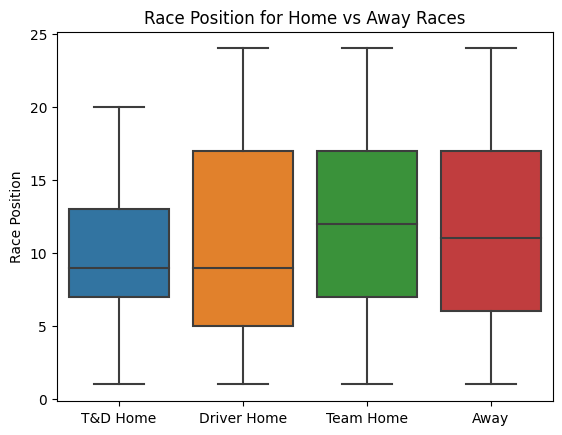

In [8]:
# Plot boxplot of race pos home and away races
sns.boxplot(data=[team_driver_home['positionOrder'], home_races['positionOrder'], team_home_races["positionOrder"], away_races['positionOrder']], showfliers=False)
plt.xticks([0, 1, 2, 3], ['T&D Home', "Driver Home", "Team Home", "Away"])
plt.ylabel("Race Position")
plt.title("Race Position for Home vs Away Races")
plt.show()

In [9]:
# Clean col
home_races = home_races[home_races['duration'].str.match('^\d+\.\d+$')]
away_races = away_races[away_races['duration'].str.match('^\d+\.\d+$')]
team_home_races = team_home_races[team_home_races['duration'].str.match('^\d+\.\d+$')]
team_away_races = team_away_races[team_away_races['duration'].str.match('^\d+\.\d+$')]
team_driver_home = team_driver_home[team_driver_home['duration'].str.match('^\d+\.\d+$')]

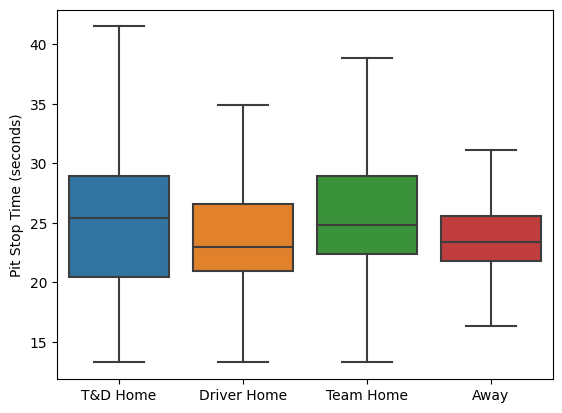

In [10]:
# Cast duration to float
team_home_races['duration'] = team_home_races['duration'].astype(float)
team_away_races['duration'] = team_away_races['duration'].astype(float)
home_races['duration'] = home_races['duration'].astype(float)
away_races['duration'] = away_races['duration'].astype(float)
team_driver_home['duration'] = team_driver_home['duration'].astype(float)

# Create boxplot of pit time stops for home and away teams
fig, ax = plt.subplots()
sns.boxplot(data=[team_driver_home['duration'], home_races['duration'], team_home_races["duration"], away_races['duration']], showfliers=False)
plt.xticks([0, 1, 2, 3], ['T&D Home', "Driver Home", "Team Home", "Away"])
ax.set_ylabel("Pit Stop Time (seconds)")
plt.show()

In [11]:
def lap_time_to_seconds(lap_time):
    try:
        minutes, seconds = lap_time.split(':')
    except ValueError:
        return 0.0  # Return 0 seconds for invalid lap times
    return float(minutes) * 60 + float(seconds)

In [12]:
# Convert lap times to seconds
team_home_races['fastestLapTimeSeconds'] = team_home_races['fastestLapTime'].apply(lap_time_to_seconds)
team_away_races['fastestLapTimeSeconds'] = team_away_races['fastestLapTime'].apply(lap_time_to_seconds)
home_races['fastestLapTimeSeconds'] = home_races['fastestLapTime'].apply(lap_time_to_seconds)
away_races['fastestLapTimeSeconds'] = away_races['fastestLapTime'].apply(lap_time_to_seconds)
team_driver_home['fastestLapTimeSeconds'] = team_driver_home['fastestLapTime'].apply(lap_time_to_seconds)


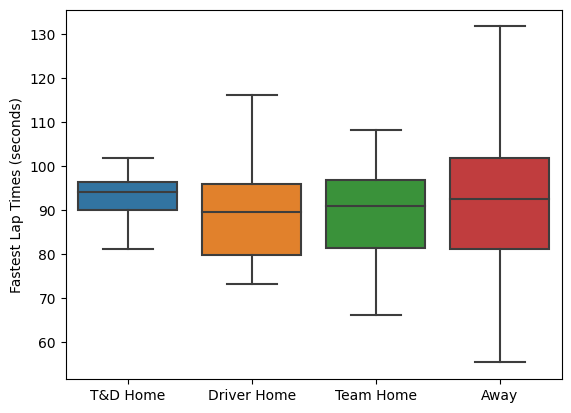

In [13]:
# Create boxplot of lap time stops for home and away teams
fig, ax = plt.subplots()
sns.boxplot(data=[team_driver_home['fastestLapTimeSeconds'], home_races['fastestLapTimeSeconds'], team_home_races["fastestLapTimeSeconds"], away_races['fastestLapTimeSeconds']], showfliers=False)
plt.xticks([0, 1, 2, 3], ['T&D Home', "Driver Home", "Team Home", "Away"])
ax.set_ylabel("Fastest Lap Times (seconds)")
plt.show()

In [14]:
import numpy as np

# Calculate mean positions for each plot
mean_team_driver_home_positions = np.mean(team_driver_home['positionOrder'])
mean_home_races_positions = np.mean(home_races['positionOrder'])
mean_team_home_races_positions = np.mean(team_home_races['positionOrder'])
mean_away_races_positions = np.mean(away_races['positionOrder'])
mean_team_away_races_positions = np.mean(team_away_races['positionOrder'])

# Calculate mean pit stop times for each plot
mean_team_driver_home_pit_stop = np.mean(team_driver_home['duration'])
mean_home_races_pit_stop = np.mean(home_races['duration'])
mean_team_home_races_pit_stop = np.mean(team_home_races['duration'])
mean_away_races_pit_stop = np.mean(away_races['duration'])
mean_team_away_races_pit_stop = np.mean(team_away_races['duration'])

# Calculate mean lap times for each plot
mean_team_driver_home_fastest_lap = np.mean(team_driver_home['fastestLapTimeSeconds'])
mean_home_races_fastest_lap = np.mean(home_races['fastestLapTimeSeconds'])
mean_team_home_races_fastest_lap = np.mean(team_home_races['fastestLapTimeSeconds'])
mean_away_races_fastest_lap = np.mean(away_races['fastestLapTimeSeconds'])
mean_team_away_races_fastest_lap = np.mean(team_away_races['fastestLapTimeSeconds'])

In [15]:
# Calculate home advantage for each plot
home_advantage_positions = (mean_team_driver_home_positions + mean_home_races_positions + mean_team_home_races_positions) / 3 - mean_away_races_positions 
home_advantage_pit_stop = (mean_team_driver_home_pit_stop + mean_home_races_pit_stop + mean_team_home_races_pit_stop) / 3 - mean_away_races_pit_stop 
home_advantage_fastest_lap = (mean_team_driver_home_fastest_lap + mean_home_races_fastest_lap ) / 2 - mean_away_races_fastest_lap 

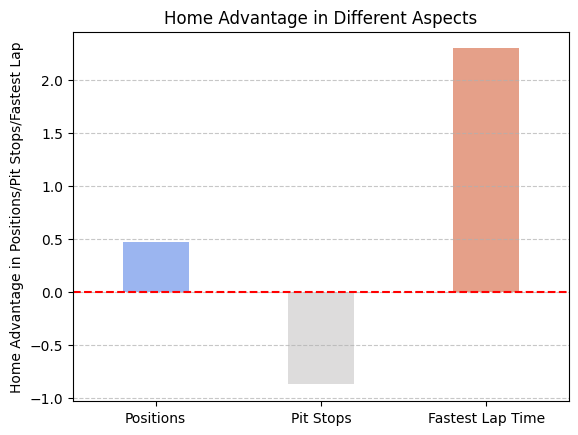

In [16]:
# Plot the home advantage for each type
fig, ax = plt.subplots()

# Customize the color palette
palette = sns.color_palette("coolwarm", 3)

# Customize the bar plot
sns.barplot(x=['Positions', 'Pit Stops', 'Fastest Lap Time'], y=[-home_advantage_positions, -home_advantage_pit_stop, -home_advantage_fastest_lap],
            ax=ax, width=0.4, palette=palette)

# Customize the plot labels and title
ax.set_xlabel('')
ax.axhline(y=0, color='red', linestyle='--')
ax.set_ylabel('Home Advantage in Positions/Pit Stops/Fastest Lap')
ax.set_title('Home Advantage in Different Aspects')

# Add custom grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the font size and type
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

plt.show()
